In [23]:
!pip install openpyxl

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('./DATA/교통 수단별 이용건수.csv')

In [26]:
df

,연도,자동차_등록대수,버스_이용건수,지하철_이용건수,택시_이용건수
0,2021,3158710,1344157818,1430691108,245574300
1,2022,3180299,1476650050,1620682806,239960766
2,2023,3191538,1524180658,1773502241,193223841
3,2024,3187776,1582835588,1831217498,237064584


In [27]:
df.describe()

,연도,자동차_등록대수,버스_이용건수,지하철_이용건수,택시_이용건수
count,4.00,4.00,4.00,4.00,4.00
mean,2022.50,3179580.75,1481956028.50,1664023413.25,228955872.75
std,1.29,14676.99,101613819.74,179129235.11,24081867.94
min,2021.00,3158710.00,1344157818.00,1430691108.00,193223841.00
25%,2021.75,3174901.75,1443526992.00,1573184881.50,226104398.25
50%,2022.50,3184037.50,1500415354.00,1697092523.50,238512675.00
75%,2023.25,3188716.50,1538844390.50,1787931055.25,241364149.50
max,2024.00,3191538.00,1582835588.00,1831217498.00,245574300.00


In [28]:
pd.options.display.float_format = '{:.2f}'.format

In [29]:
df.columns

Index(['연도', '자동차_등록대수', '버스_이용건수', '지하철_이용건수', '택시_이용건수'], dtype='object')

In [30]:
import matplotlib.pyplot as plt

In [31]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [33]:
values = [
    df['버스_이용건수'].iloc[3],
    df['지하철_이용건수'].iloc[3],
    df['택시_이용건수'].iloc[3]]

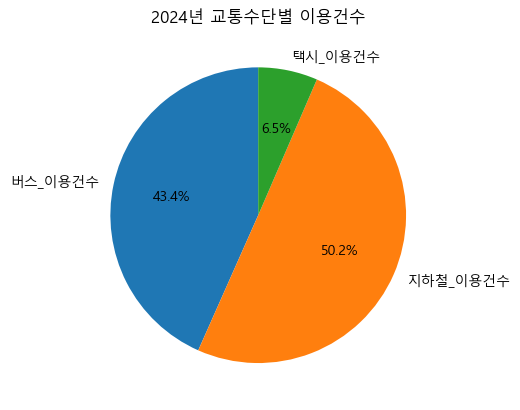

In [34]:
plt.pie(
    values,
    labels=('버스_이용건수', '지하철_이용건수', '택시_이용건수'),
    autopct='%.1f%%',
    startangle=90
)

plt.title('2024년 교통수단별 이용건수')
# plt.axis('equal')  # 원을 동그랗게
plt.show()

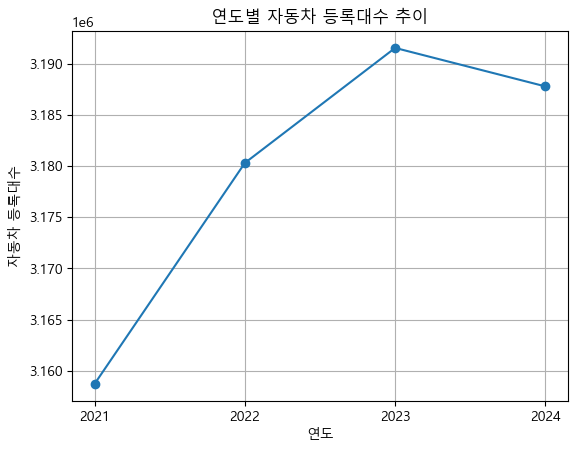

In [36]:
plt.plot(
    df['연도'],
    df['자동차_등록대수'],
    marker='o'
)

plt.xlabel('연도')
plt.ylabel('자동차 등록대수')
plt.title('연도별 자동차 등록대수 추이')

plt.xticks([2021, 2022, 2023, 2024])
plt.grid(True)
plt.show()

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [39]:
X = df[['버스_이용건수', '지하철_이용건수', '택시_이용건수']].values
y = df['자동차_등록대수'].values

# 2) 모델 학습
lr = LinearRegression()
lr.fit(X, y)

# 3) 결과 확인
print("R^2 (train):", lr.score(X, y))
print("절편(intercept):", lr.intercept_)
print("계수(coef) [버스, 지하철, 택시]:", lr.coef_)

# 4) 예측값 vs 실제값
y_pred = lr.predict(X)
print("실제 y:", y)
print("예측 y:", np.round(y_pred, 2))

# 5) 잔차(오차)
residuals = y - y_pred
print("잔차:", np.round(residuals, 2))

R^2 (train): 1.0
절편(intercept): 2975327.3686741125
계수(coef) [버스, 지하철, 택시]: [ 0.00037386 -0.00015824 -0.00037768]
실제 y: [3158710 3180299 3191538 3187776]
예측 y: [3158710. 3180299. 3191538. 3187776.]
잔차: [0. 0. 0. 0.]
